## 📊 Análise de Vendas de Produtos - 2024

**Objetivo:** Analisar o desempenho de vendas de diferentes produtos ao longo de 2024.

**Dataset:** Base fictícia de vendas com colunas: Data da Venda, Produto, Quantidade Vendida, Preço Unitário, Receita Total.

**Ferramentas:** Python, Pandas, Matplotlib, Seaborn.

# 1. BIBLIOTECAS:

In [63]:
%pip install plotly

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# 2. DATASET:

In [65]:
df = pd.read_csv('vendas.csv')

In [66]:
df.head()

,Data,Produto,Categoria,Quantidade,PrecoUnitario
0,2024-01-01,Jaqueta,Roupas,1,71.36
1,2024-01-01,Meia,Acessórios,1,63.69
2,2024-01-01,Calça Jeans,Roupas,3,36.26
3,2024-01-02,Meia,Acessórios,4,60.00
4,2024-01-02,Calça Jeans,Roupas,2,35.80


# 3. EXPLORAÇÃO INICIAL:

In [67]:
# INFO:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 950 entries, 0 to 949
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Data           950 non-null    object 
 1   Produto        950 non-null    object 
 2   Categoria      950 non-null    object 
 3   Quantidade     950 non-null    int64  
 4   PrecoUnitario  950 non-null    float64
dtypes: float64(1), int64(1), object(3)
memory usage: 37.2+ KB


In [68]:
# VERIFICAÇÃO DE NULOS:
df.isnull().sum()

Data             0
Produto          0
Categoria        0
Quantidade       0
PrecoUnitario    0
dtype: int64

In [69]:
# VERIFICAÇÃO DE DADOS DUPLICADOS:
df.duplicated().sum()

np.int64(0)

In [70]:
# DESCRIBE:
df.describe()

,Quantidade,PrecoUnitario
count,950.000000,950.000000
mean,2.506316,160.650579
std,1.132647,81.941052
min,1.000000,21.300000
25%,1.000000,87.157500
50%,2.000000,165.890000
75%,4.000000,231.495000
max,4.000000,299.420000


In [71]:
# VERIFICAR PRODUTOS E CATEGORIAS ÚNICOS:
print("Produtos únicos:", df['Produto'].unique())
print("Categorias únicas:", df['Categoria'].unique())

Produtos únicos: ['Jaqueta' 'Meia' 'Calça Jeans' 'Boné' 'Camiseta' 'Tênis']
Categorias únicas: ['Roupas' 'Acessórios' 'Calçados']


# 4. PRÉ-PROCESSAMENTO DE DADOS:

In [72]:
# CONVERTER A COLUNA 'Data' PARA O TIPO DATETIME:
df['Data'] = pd.to_datetime(df['Data'])

In [73]:
# CRIAÇÃO DAS COLUNAS 'Ano', 'Mês' e 'Dia':
df['Ano'] = df['Data'].dt.year
df['Mes'] = df['Data'].dt.month
df['Dia'] = df['Data'].dt.day

In [74]:
# CRIAÇÃO DA COLUNA 'ValorTotal':
df['ValorTotal'] = df['Quantidade'] * df['PrecoUnitario']

In [75]:
df

,Data,Produto,Categoria,Quantidade,PrecoUnitario,Ano,Mes,Dia,ValorTotal
0,2024-01-01,Jaqueta,Roupas,1,71.36,2024,1,1,71.36
1,2024-01-01,Meia,Acessórios,1,63.69,2024,1,1,63.69
2,2024-01-01,Calça Jeans,Roupas,3,36.26,2024,1,1,108.78
3,2024-01-02,Meia,Acessórios,4,60.00,2024,1,2,240.00
4,2024-01-02,Calça Jeans,Roupas,2,35.80,2024,1,2,71.60
...,...,...,...,...,...,...,...,...,...
945,2024-12-29,Jaqueta,Roupas,4,265.63,2024,12,29,1062.52
946,2024-12-30,Boné,Acessórios,2,269.84,2024,12,30,539.68
947,2024-12-31,Meia,Acessórios,2,242.48,2024,12,31,484.96
948,2024-12-31,Boné,Acessórios,4,183.19,2024,12,31,732.76


# 5. ANÁLISE EXPLORATÓRIA (EDA):

## 5.1. DISTRIBUIÇÃO DAS VARIÁVEIS NUMÉRICAS:

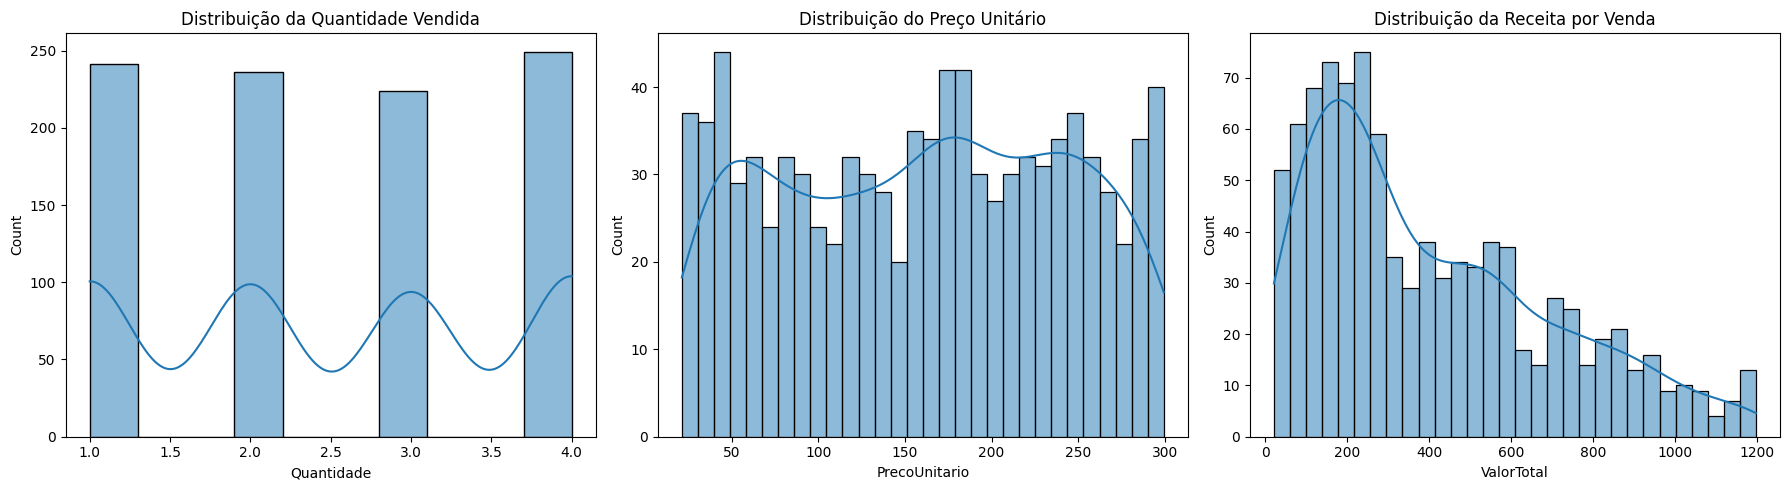

In [76]:
# CRIAÇÃO DA FIGURA E DOS EIXOS:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# DISTRIBUIÇÃO DA QUANTIDADE DE VENDAS:
sns.histplot(df['Quantidade'], bins=10, kde=True, ax=axes[0])
axes[0].set_title('Distribuição da Quantidade Vendida')

# DISTRIBUIÇÃO DO PREÇO UNITÁRIO:
sns.histplot(df['PrecoUnitario'], bins=30, kde=True, ax=axes[1])
axes[1].set_title('Distribuição do Preço Unitário')

# DISTRIBUIÇÃO DO VALOR TOTAL:
sns.histplot(df['ValorTotal'], bins=30, kde=True, ax=axes[2])
axes[2].set_title('Distribuição da Receita por Venda')

plt.tight_layout()
plt.show()

## 5.2. DISTRIBUIÇÃO DAS VARIÁVEIS CATEGÓRICAS:

In [77]:
# CATEGORIA:
categoria_analise = df.groupby('Categoria').agg({
    'Quantidade': 'sum',
    'ValorTotal': 'sum',
    'PrecoUnitario': 'mean'
}).sort_values('ValorTotal', ascending=False)

print("Análise por Categoria:")
display(categoria_analise)

# PRODUTO:
produto_analise = df.groupby(['Categoria', 'Produto']).agg({
    'Quantidade': 'sum',
    'ValorTotal': 'sum',
    'PrecoUnitario': 'mean'
}).sort_values('ValorTotal', ascending=False)

print("\nAnálise por Produto:")
display(produto_analise.head(10))

Análise por Categoria:


,Quantidade,ValorTotal,PrecoUnitario
Categoria,,,
Roupas,1092,175730.93,159.459752
Acessórios,843,135638.73,162.082394
Calçados,446,73877.38,160.970057



Análise por Produto:


Quantidade  ValorTotal  PrecoUnitario
Categoria  Produto                                           
Calçados   Tênis               446    73877.38     160.970057
Acessórios Boné                455    72913.49     163.236420
Roupas     Camiseta            390    64709.45     164.626500
Acessórios Meia                388    62725.24     160.763506
Roupas     Jaqueta             347    57129.76     159.420952
           Calça Jeans         355    53891.72     153.467226

### 5.2.1. GRÁFICO 'ValorTotal' POR 'Categoria':

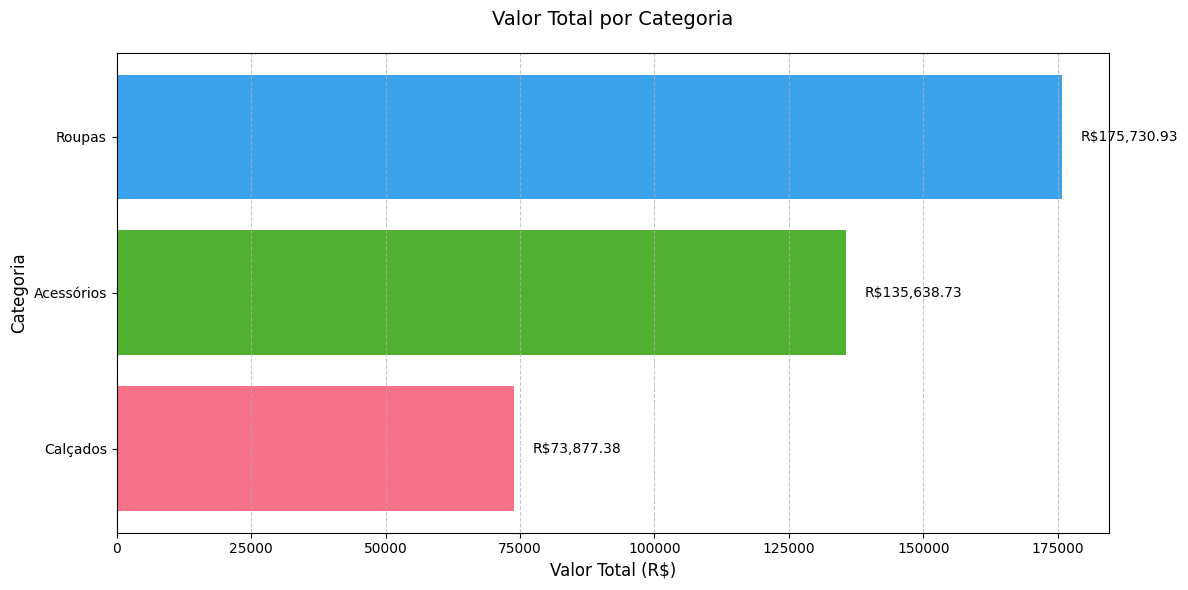

In [78]:
plt.figure(figsize=(12, 6))

# ORDENAÇÃO DAS 'Categorias' POR 'ValorTtotal':
categoria_ordenada = categoria_analise.sort_values('ValorTotal', ascending=True)

# GRÁFICO DE BARRAS HORIZONTAIS:
bars = plt.barh(categoria_ordenada.index, categoria_ordenada['ValorTotal'], 
                color=sns.color_palette('husl', len(categoria_ordenada)))

# VALORES AO FINAL DAS BARRAS:
for bar in bars:
    width = bar.get_width()
    plt.text(width + (categoria_ordenada['ValorTotal'].max()*0.02), 
             bar.get_y() + bar.get_height()/2,
             f'R${width:,.2f}',
             va='center')

plt.title('Valor Total por Categoria', fontsize=14, pad=20)
plt.xlabel('Valor Total (R$)', fontsize=12)
plt.ylabel('Categoria', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### 5.2.2. GRÁFICO DE 'ValorTotal' POR 'Produto':

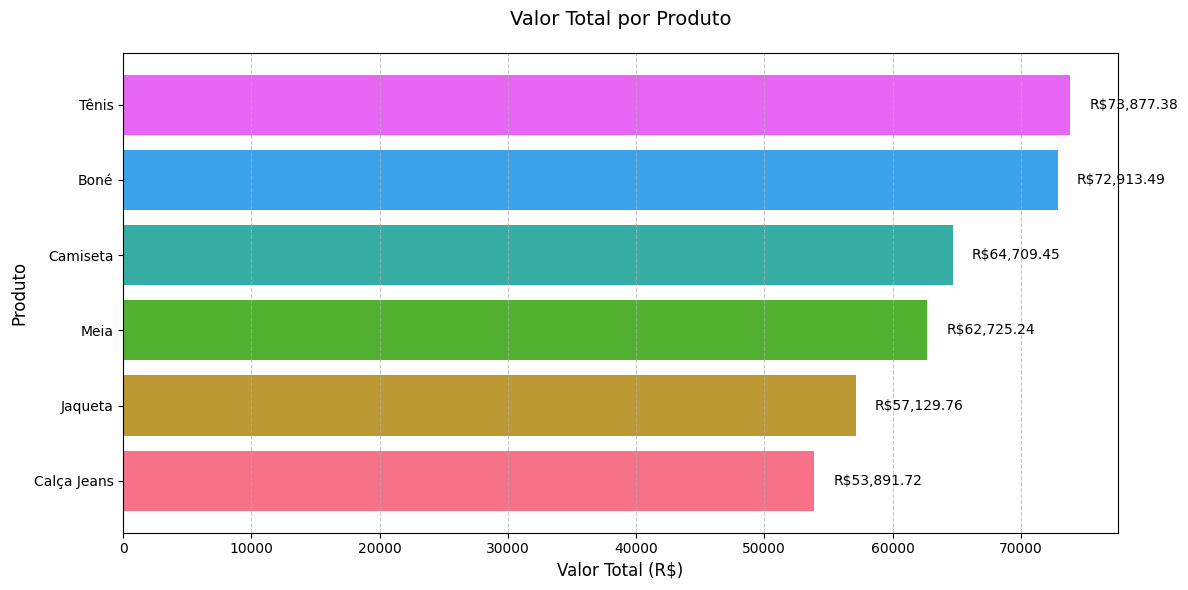

In [91]:
plt.figure(figsize=(12, 6))

# ORDENAÇÃO DOS 'Produtos' POR 'ValorTtotal':
produto_ordenada = produto_analise.sort_values('ValorTotal', ascending=True)

# GRÁFICO DE BARRAS HORIZONTAIS:
bars = plt.barh(produto_ordenada.index.get_level_values('Produto'), produto_ordenada['ValorTotal'], 
                color=sns.color_palette('husl', len(produto_ordenada)))

# VALORES AO FINAL DAS BARRAS:
for bar in bars:
    width = bar.get_width()
    plt.text(width + (produto_ordenada['ValorTotal'].max()*0.02), 
             bar.get_y() + bar.get_height()/2,
             f'R${width:,.2f}',
             va='center')

plt.title('Valor Total por Produto', fontsize=14, pad=20)
plt.xlabel('Valor Total (R$)', fontsize=12)
plt.ylabel('Produto', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### 5.2.3. GRÁFICO 'Quantidade' POR 'Categoria':

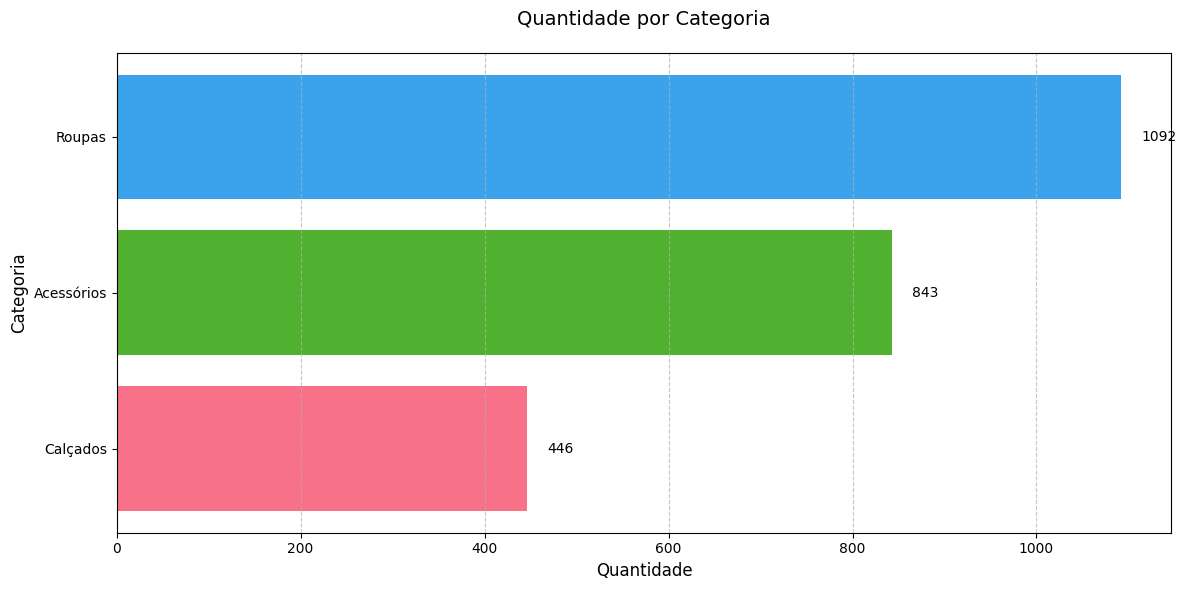

In [79]:
plt.figure(figsize=(12, 6))

# ORDENAÇÃO DAS 'Categorias' POR 'ValorTtotal':
categoria_ordenada = categoria_analise.sort_values('Quantidade', ascending=True)

# GRÁFICO DE BARRAS HORIZONTAIS:
bars = plt.barh(categoria_ordenada.index, categoria_ordenada['Quantidade'], 
                color=sns.color_palette('husl', len(categoria_ordenada)))

# VALORES AO FINAL DAS BARRAS:
for bar in bars:
    width = bar.get_width()
    plt.text(width + (categoria_ordenada['Quantidade'].max()*0.02), 
             bar.get_y() + bar.get_height()/2,
             f'{width}',
             va='center')

plt.title('Quantidade por Categoria', fontsize=14, pad=20)
plt.xlabel('Quantidade', fontsize=12)
plt.ylabel('Categoria', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### 5.2.4. GRÁFICO 'Quantidade' POR 'Produto':

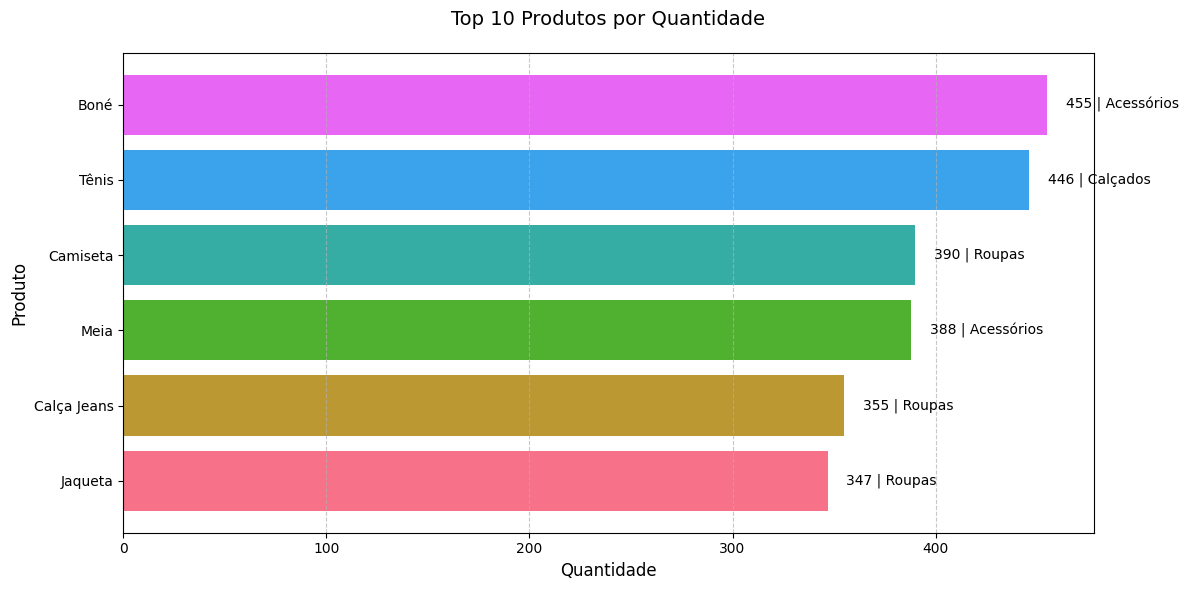

In [92]:
# SELEÇÃO DOS 10 PRODUTOS MAIS VENDIDOS:
top10_produtos = produto_analise.head(10).sort_values('Quantidade', ascending=True)

# GRÁFICO DE BARRAS HORIZONTAIS PARA OS 10 PRODUTOS MAIS VENDIDOS:
plt.figure(figsize=(12, 6))
bars = plt.barh(top10_produtos.index.get_level_values('Produto'), top10_produtos['Quantidade'],
               color=sns.color_palette('husl', len(top10_produtos)))

# VALORES E CATEGORIA AO FINAL DAS BARRAS:
for i, bar in enumerate(bars):
    width = bar.get_width()
    categoria = top10_produtos.index.get_level_values('Categoria')[i]
    plt.text(width + (top10_produtos['Quantidade'].max()*0.02), 
             bar.get_y() + bar.get_height()/2,
             f'{width} | {categoria}',
             va='center')

plt.title('Top 10 Produtos por Quantidade', fontsize=14, pad=20)
plt.xlabel('Quantidade', fontsize=12)
plt.ylabel('Produto', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# 6. VISUALIZAÇÕES:

## 6.1. EVOLUÇÃO MENSAL DAS VENDAS:

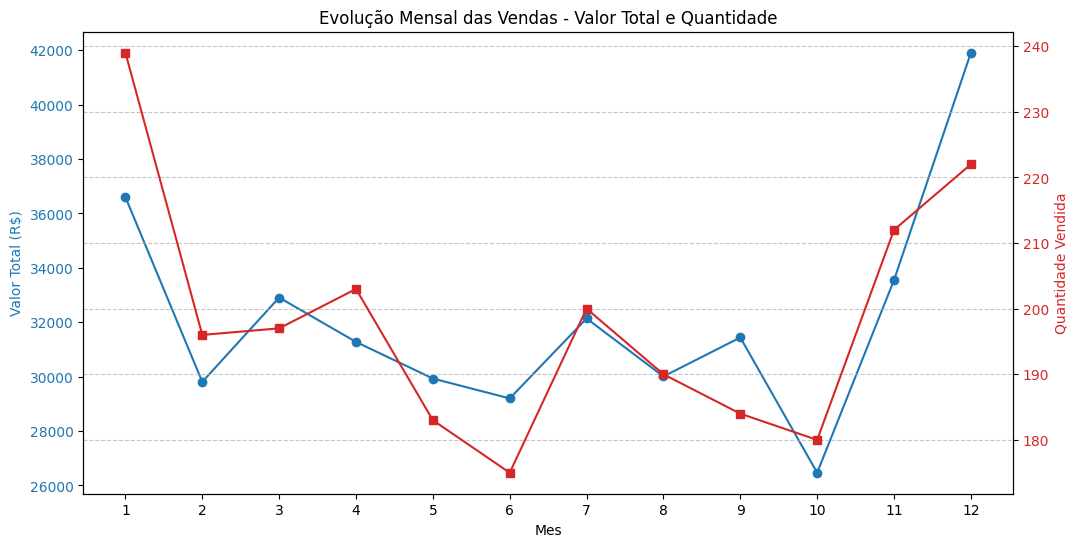

In [88]:
# AGRUPAMENTO POR MÊS:
mensal = df.groupby('Mes').agg({'ValorTotal': 'sum', 'Quantidade': 'sum'}).reset_index()

fig, ax1 = plt.subplots(figsize=(12, 6))

color = 'tab:blue'
ax1.set_xlabel('Mes')
ax1.set_ylabel('Valor Total (R$)', color=color)
ax1.plot(mensal['Mes'], mensal['ValorTotal'], color=color, marker='o')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Quantidade Vendida', color=color)
ax2.plot(mensal['Mes'], mensal['Quantidade'], color=color, marker='s')
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Evolução Mensal das Vendas - Valor Total e Quantidade')
plt.xticks(range(1, 13))
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

## 6.2. ANÁLISE TEMPORAL:

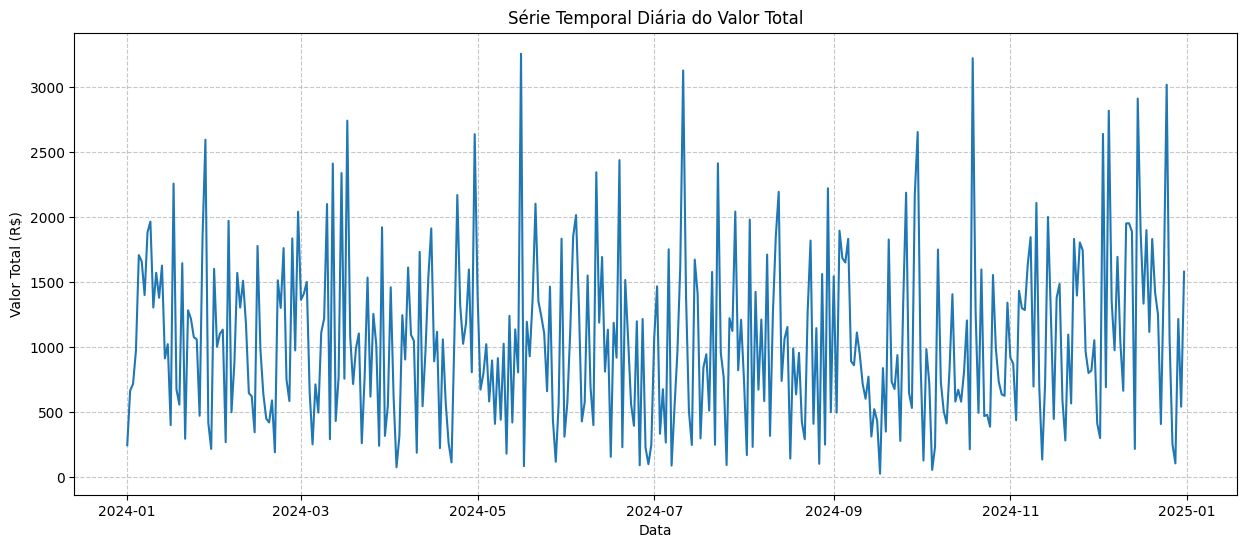

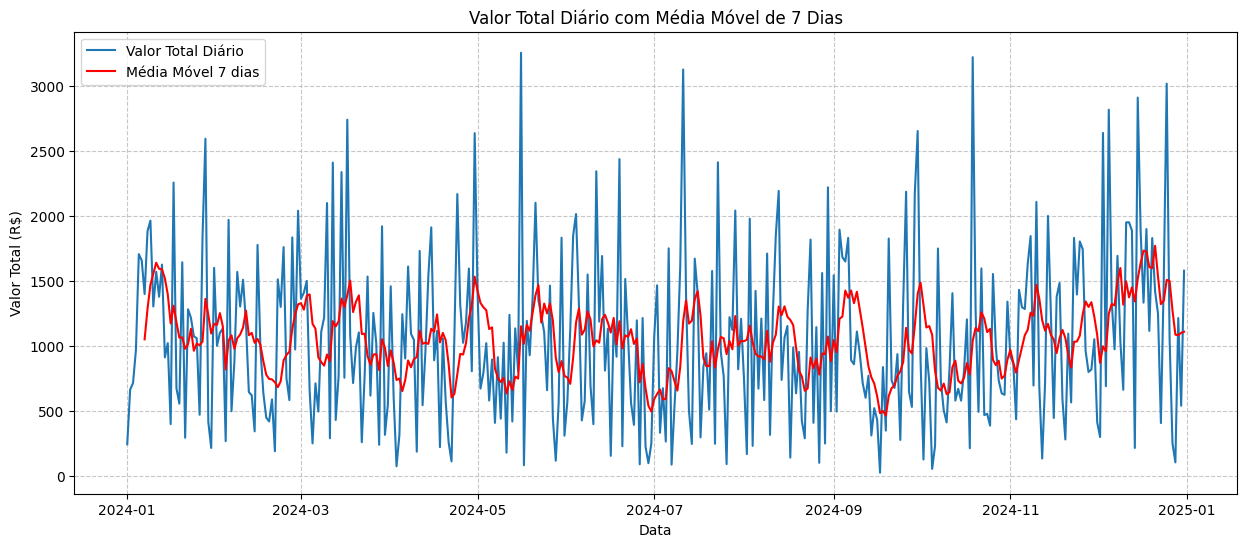

In [87]:
# SÉRIE TEMPORAL DIÁRIA DO VALOR TOTAL:
diaria = df.groupby('Data').agg({'ValorTotal': 'sum'}).reset_index()

# PLOTAGEM DA SÉRIE TEMPORAL DIÁRIA:
plt.figure(figsize=(15, 6))
sns.lineplot(data=diaria, x='Data', y='ValorTotal')
plt.title('Série Temporal Diária do Valor Total')
plt.xlabel('Data')
plt.ylabel('Valor Total (R$)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# MÉDIA MÓVEL (7 DIAS):
diaria['MediaMovel'] = diaria['ValorTotal'].rolling(window=7).mean()

plt.figure(figsize=(15, 6))
sns.lineplot(data=diaria, x='Data', y='ValorTotal', label='Valor Total Diário')
sns.lineplot(data=diaria, x='Data', y='MediaMovel', label='Média Móvel 7 dias', color='red')
plt.title('Valor Total Diário com Média Móvel de 7 Dias')
plt.xlabel('Data')
plt.ylabel('Valor Total (R$)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# 7. INSIGHTS E RECOMENDAÇÕES:

### A. Desempenho Financeiro por Categoria
Calçados lideram em valor total de vendas com R$175.730,93

Acessórios vêm em segundo lugar com R$135.638,73

Roupas (provavelmente itens como camisetas, jaquetas) têm o menor valor total com R$73.877,38

#### Insight: Calçados (especialmente tênis) são os produtos que mais contribuem para o faturamento, sugerindo que merecem maior atenção em estratégias de marketing e estoque.

### B. Produtos Individuais com Maior Faturamento
Tênis é o produto mais vendido em valor (R$78.877,38)

Boné vem em segundo (R$72.913,49), surpreendentemente à frente de itens como jaquetas

Calça Jeans tem o menor valor entre os listados (R$53.891,72)

#### Insight: Apesar de geralmente terem preço unitário menor, acessórios como bonés têm excelente desempenho financeiro, possivelmente por maior volume de vendas ou margem de lucro.

### C. Volume de Vendas por Categoria
Acessórios lideram em quantidade (446 unidades mostradas no primeiro gráfico, com boné aparecendo como top produto)

Calçados vem em seguida (446 unidades)

Roupas aparecem com menor volume (390 unidades)

#### Insight: Há uma correlação inversa interessante - enquanto acessórios vendem mais unidades, calçados geram mais receita, sugerindo maior valor unitário dos calçados.

### D. Produtos Mais Vendidos em Quantidade
Boné é o produto mais vendido (455 unidades)

Tênis vem logo atrás (446 unidades)

Camiseta completa o top 3 (390 unidades)

#### Insight: Produtos de preço mais acessível (bonés, camisetas) dominam em volume, enquanto itens como jaquetas e calças jeans têm menor rotatividade.

### E. Recomendações Estratégicas:
Focar em calçados para maximizar receita, mantendo estoque adequado de tênis

Explorar o sucesso dos acessórios (especialmente bonés) - possivelmente expandir linha de acessórios

Analisar margens de lucro - os acessórios podem ter margens melhores apesar do menor preço unitário

Promoções cruzadas - oferecer bonés com tênis, já que ambos são top sellers

Investigar baixo desempenho de calças jeans e jaquetas - talvez necessitem de reposicionamento